# Penulisan Ilmiah
## Datadiri :
>
> Nama : Muhammad Faqih Hakim
>
> NPM : 51422032

In [1]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.6 MB/s eta 0:00:00


In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.7 MB/s eta 0:00:00


In [1]:
import yaml
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import random
import itertools
from ultralytics import YOLO
from roboflow import Roboflow
import pandas as pd
from google.colab import files
from datetime import datetime

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
rf = Roboflow(api_key="jFj6dO8DDczUZ9kJ1xuo")
project = rf.workspace("kkkk-6bpnc").project("kk-8ucwu")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to kk-2 in yolov8:: 100%|██████████| 14612/14612 [00:01<00:00, 9480.82it/s] 


In [3]:
train_images_path = "/content/kk-2/train/images"
train_labels_path = "/content/kk-2/train/labels"

In [4]:
image_files = [f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
sample_files = random.sample(image_files, min(12, len(image_files)))

In [5]:
def draw_bounding_boxes(img, label_path):
    h, w = img.shape[:2]
    with open("/content/kk-2/data.yaml", 'r') as f:
        data = yaml.safe_load(f)
    class_names = data['names']

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            if line.strip():
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:5])
                x_center *= w
                y_center *= h
                width *= w
                height *= h

                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)

                color = (0, 255, 0)
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                class_name = class_names[class_id] if class_id < len(class_names) else f"Class_{class_id}"
                text_size, _ = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                text_y = y1 - 5 if y1 - 5 > text_size[1] else y2 + text_size[1] + 5
                cv2.putText(img, class_name, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return img

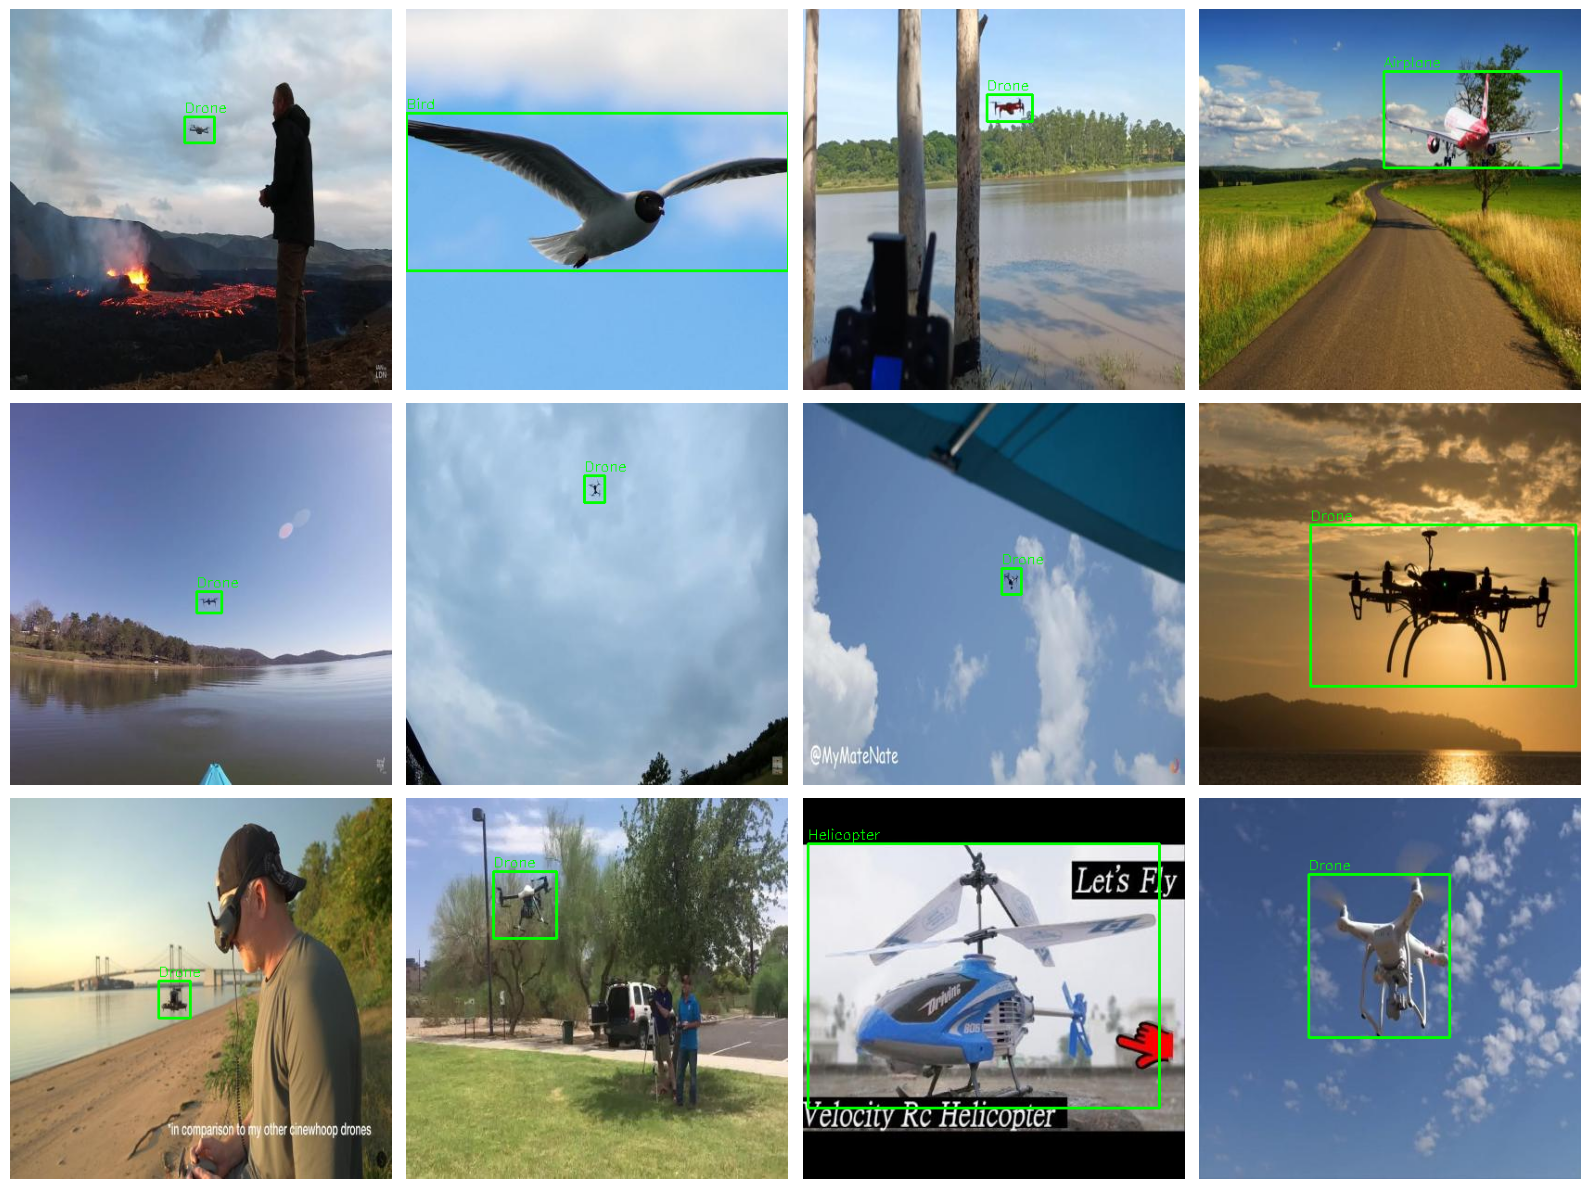

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, img_file in enumerate(sample_files):
    img_path = os.path.join(train_images_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    label_path = os.path.join(train_labels_path, label_file)

    img = draw_bounding_boxes(img, label_path)

    axes[i].imshow(img)
    axes[i].axis('off')

for i in range(len(sample_files), 12):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [6]:
learning_rates = [0.0005, 0.001]
batch_sizes = [8]
weight_decays = [0.0005, 0.001]
optimizers = ['Adam']

In [7]:
combos = list(itertools.product(learning_rates, batch_sizes, weight_decays, optimizers))
print(f"Total kombinasi: {len(combos)}")
for i, (lr, batch, wd, opt) in enumerate(combos):
    print(f"Kombinasi {i+1}: LR={lr}, Batch={batch}, WD={wd}, Optimizer={opt}")

Total kombinasi: 4
Kombinasi 1: LR=0.0005, Batch=8, WD=0.0005, Optimizer=Adam
Kombinasi 2: LR=0.0005, Batch=8, WD=0.001, Optimizer=Adam
Kombinasi 3: LR=0.001, Batch=8, WD=0.0005, Optimizer=Adam
Kombinasi 4: LR=0.001, Batch=8, WD=0.001, Optimizer=Adam


In [8]:
for i, (lr, batch, weight_decay, optimizer) in enumerate(combos):
    print("=" * 60)
    print(f"Training Model {i+1}/{len(combos)}")
    print(f"Start Time   : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Parameters  : lr={lr}, batch={batch}, weight_decay={weight_decay}, optimizer={optimizer}")
    print(f"Dir Save Name   : run_{i+1}_lr{lr}_b{batch}_wd{weight_decay}_{optimizer}")
    print("=" * 60)

    model = YOLO("yolo12n.pt")

    model.train(
        data="/content/kk-2/data.yaml",
        epochs=15,
        imgsz=640,
        batch=batch,
        lr0=lr,
        optimizer=optimizer,
        weight_decay=weight_decay,

        # Regularization
        warmup_epochs=3,
        dropout=0.1,
        patience=10,

        # Augmentation
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        degrees=10.0,
        translate=0.1,
        scale=0.5,
        shear=2.0,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.1,
        copy_paste=0.1,

        # Output
        name=f"YOLOV12_run_{i+1}_lr{lr}_b{batch}_wd{weight_decay}_{optimizer}",
        plots=False,
        save=True,
        save_period=10,
        verbose=False,
        device=0
    )

Training Model 1/4
Start Time   : 2025-06-01 12:04:04
Parameters  : lr=0.0005, batch=8, weight_decay=0.0005, optimizer=Adam
Dir Save Name   : run_1_lr0.0005_b8_wd0.0005_Adam


100%|██████████| 5.34M/5.34M [00:00<00:00, 308MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOV12_run_1_lr0.0005_b8_wd0.0005_Adam, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=10, perspective=0.0, plots=

100%|██████████| 755k/755k [00:00<00:00, 16.9MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

 21        [14, 17, 20]  1    431452  ultralytics.nn.modules.head.Detect           [4, [64, 128, 256]]           
YOLOv12n summary: 272 layers, 2,568,828 parameters, 2,568,812 gradients, 6.5 GFLOPs

Transferred 640/691 items from pretrained weights
Freezing layer 'model.21.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 393MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.1 ms, read: 256.0±93.1 MB/s, size: 15.4 KB)


train: Scanning /content/kk-2/train/labels... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:02<00:00, 2197.30it/s]


train: New cache created: /content/kk-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 367.4±208.3 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<00:00, 1039.33it/s]


val: New cache created: /content/kk-2/valid/labels.cache
optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV12_run_1_lr0.0005_b8_wd0.0005_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.72G      1.489      2.127      1.601         11        640: 100%|██████████| 721/721 [02:58<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.58it/s]

                   all        778        843      0.655      0.603      0.634      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.97G      1.411      1.684      1.542         23        640: 100%|██████████| 721/721 [02:42<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.98it/s]

                   all        778        843      0.692      0.688      0.745      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.98G      1.374      1.558      1.519         19        640: 100%|██████████| 721/721 [02:42<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:09<00:00,  5.35it/s]

                   all        778        843      0.848      0.758      0.861      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         2G       1.33      1.459      1.499         11        640: 100%|██████████| 721/721 [02:40<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.77it/s]

                   all        778        843      0.855      0.809      0.866      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.01G      1.299      1.372      1.478         13        640: 100%|██████████| 721/721 [02:40<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.58it/s]

                   all        778        843      0.896      0.849      0.914      0.635


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.03G      1.118     0.9048      1.364          7        640: 100%|██████████| 721/721 [02:30<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.91it/s]

                   all        778        843      0.879      0.822      0.908      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.04G      1.096      0.818       1.34          7        640: 100%|██████████| 721/721 [02:28<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.85it/s]

                   all        778        843      0.925       0.85      0.931       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.06G      1.052      0.759      1.303          8        640: 100%|██████████| 721/721 [02:30<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.11it/s]

                   all        778        843      0.942      0.891      0.958      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.07G      1.039      0.704      1.288          8        640: 100%|██████████| 721/721 [02:30<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.81it/s]

                   all        778        843      0.967       0.86      0.951      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.09G      1.025     0.6637      1.284          7        640: 100%|██████████| 721/721 [02:29<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.06it/s]

                   all        778        843      0.944      0.911      0.964      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       2.1G     0.9995      0.635      1.262          7        640: 100%|██████████| 721/721 [02:29<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.86it/s]

                   all        778        843      0.975      0.897      0.972      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.12G     0.9758     0.5935      1.245          7        640: 100%|██████████| 721/721 [02:28<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.15it/s]

                   all        778        843      0.954      0.937      0.972      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.13G     0.9514     0.5686      1.224          8        640: 100%|██████████| 721/721 [02:26<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.23it/s]

                   all        778        843      0.951       0.93      0.974      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.15G     0.9238     0.5381      1.208          8        640: 100%|██████████| 721/721 [02:30<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.89it/s]


                   all        778        843      0.963      0.937      0.978      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.16G     0.9097     0.5197      1.196          7        640: 100%|██████████| 721/721 [02:29<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.01it/s]

                   all        778        843      0.948      0.958      0.978      0.775



15 epochs completed in 0.679 hours.
Optimizer stripped from runs/detect/YOLOV12_run_1_lr0.0005_b8_wd0.0005_Adam/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/YOLOV12_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt, 5.5MB

Validating runs/detect/YOLOV12_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,508 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.87it/s]

                   all        778        843       0.95      0.958      0.979      0.775
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 1.7ms postprocess per image


Training Model 2/4
Start Time   : 2025-06-01 12:45:19
Parameters  : lr=0.0005, batch=8, weight_decay=0.001, optimizer=Adam
Dir Save Name   : run_2_lr0.0005_b8_wd0.001_Adam
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale

100%|██████████| 5.35M/5.35M [00:00<00:00, 299MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 762.0±524.9 MB/s, size: 15.4 KB)


train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.4±0.8 ms, read: 263.3±186.8 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.001), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV12_run_2_lr0.0005_b8_wd0.001_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.79G      1.484      2.082      1.591         11        640: 100%|██████████| 721/721 [02:54<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.93it/s]

                   all        778        843      0.623      0.599      0.655       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.99G      1.413      1.674      1.547         23        640: 100%|██████████| 721/721 [02:42<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.10it/s]

                   all        778        843      0.776      0.697      0.787      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.99G      1.375      1.566      1.523         19        640: 100%|██████████| 721/721 [02:39<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.12it/s]

                   all        778        843      0.834      0.728      0.828      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.99G      1.339      1.452      1.503         11        640: 100%|██████████| 721/721 [02:40<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.62it/s]

                   all        778        843      0.852      0.811      0.872      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.99G      1.299      1.353      1.475         13        640: 100%|██████████| 721/721 [02:39<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.80it/s]

                   all        778        843      0.928      0.836      0.924      0.622


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.99G      1.116     0.9091       1.37          7        640: 100%|██████████| 721/721 [02:32<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.14it/s]

                   all        778        843      0.918      0.847      0.931      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.99G      1.088     0.8021       1.34          7        640: 100%|██████████| 721/721 [02:30<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.35it/s]

                   all        778        843      0.951      0.848      0.939      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.99G      1.065      0.736      1.315          8        640: 100%|██████████| 721/721 [02:30<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.68it/s]

                   all        778        843      0.945      0.871      0.949      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.99G      1.039     0.6936      1.292          8        640: 100%|██████████| 721/721 [02:32<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.20it/s]

                   all        778        843      0.934      0.896       0.95      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.99G       1.02     0.6511      1.284          7        640: 100%|██████████| 721/721 [02:31<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.94it/s]

                   all        778        843      0.926      0.914      0.947      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.99G      0.989     0.6239      1.252          7        640: 100%|██████████| 721/721 [02:30<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.06it/s]

                   all        778        843      0.947      0.889      0.962      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.99G     0.9642     0.5842      1.242          7        640: 100%|██████████| 721/721 [02:31<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.25it/s]

                   all        778        843      0.941      0.944      0.972      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.99G      0.955     0.5622      1.227          8        640: 100%|██████████| 721/721 [02:30<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.70it/s]

                   all        778        843      0.964      0.913      0.968      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.99G     0.9231     0.5274      1.211          8        640: 100%|██████████| 721/721 [02:30<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.24it/s]

                   all        778        843      0.962      0.936      0.972      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.99G     0.9014     0.5079      1.195          7        640: 100%|██████████| 721/721 [02:30<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.01it/s]

                   all        778        843      0.963      0.938      0.977       0.76



15 epochs completed in 0.680 hours.
Optimizer stripped from runs/detect/YOLOV12_run_2_lr0.0005_b8_wd0.001_Adam/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/YOLOV12_run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt, 5.5MB

Validating runs/detect/YOLOV12_run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,508 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.96it/s]

                   all        778        843      0.963      0.939      0.977       0.76
Speed: 0.3ms preprocess, 3.6ms inference, 0.0ms loss, 1.7ms postprocess per image


Training Model 3/4
Start Time   : 2025-06-01 13:26:20
Parameters  : lr=0.001, batch=8, weight_decay=0.0005, optimizer=Adam
Dir Save Name   : run_3_lr0.001_b8_wd0.0005_Adam
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±2.4 ms, read: 183.0±66.9 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV12_run_3_lr0.001_b8_wd0.0005_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.76G      1.542      2.166      1.631         11        640: 100%|██████████| 721/721 [02:55<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.63it/s]

                   all        778        843      0.564      0.516      0.528      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.95G      1.502      1.846      1.622         23        640: 100%|██████████| 721/721 [02:44<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.20it/s]

                   all        778        843      0.641      0.513      0.568      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.95G       1.47      1.756      1.602         19        640: 100%|██████████| 721/721 [02:42<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.28it/s]

                   all        778        843      0.609      0.634      0.684      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.95G      1.415      1.652      1.564         11        640: 100%|██████████| 721/721 [02:39<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.00it/s]

                   all        778        843      0.768      0.679      0.783      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.95G       1.38      1.534      1.536         13        640: 100%|██████████| 721/721 [02:39<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.17it/s]

                   all        778        843      0.844      0.718      0.852      0.575


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.95G      1.193      1.054      1.442          7        640: 100%|██████████| 721/721 [02:32<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.94it/s]

                   all        778        843      0.793      0.732      0.803      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.95G      1.157     0.9403       1.41          7        640: 100%|██████████| 721/721 [02:32<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.61it/s]


                   all        778        843      0.914      0.818      0.911       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.95G      1.125     0.8687      1.365          8        640: 100%|██████████| 721/721 [02:33<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.52it/s]

                   all        778        843       0.91      0.822      0.928      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.95G        1.1     0.7943       1.35          8        640: 100%|██████████| 721/721 [02:31<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.02it/s]

                   all        778        843      0.921      0.837      0.925      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.95G       1.08     0.7483       1.34          7        640: 100%|██████████| 721/721 [02:32<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.78it/s]

                   all        778        843      0.904       0.88       0.95      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.95G      1.043     0.7138      1.303          7        640: 100%|██████████| 721/721 [02:32<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.05it/s]

                   all        778        843      0.954      0.882      0.961      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.95G      1.024     0.6682      1.298          7        640: 100%|██████████| 721/721 [02:32<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.12it/s]

                   all        778        843      0.941      0.874      0.953      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.95G      1.007     0.6456      1.275          8        640: 100%|██████████| 721/721 [02:33<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.81it/s]

                   all        778        843      0.952      0.876       0.96      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.95G     0.9726     0.5993      1.254          8        640: 100%|██████████| 721/721 [02:32<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.05it/s]

                   all        778        843      0.923      0.921      0.969      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.95G     0.9558     0.5673       1.24          7        640: 100%|██████████| 721/721 [02:30<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.29it/s]


                   all        778        843      0.952      0.921      0.972      0.735

15 epochs completed in 0.686 hours.
Optimizer stripped from runs/detect/YOLOV12_run_3_lr0.001_b8_wd0.0005_Adam/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/YOLOV12_run_3_lr0.001_b8_wd0.0005_Adam/weights/best.pt, 5.5MB

Validating runs/detect/YOLOV12_run_3_lr0.001_b8_wd0.0005_Adam/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,508 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.78it/s]

                   all        778        843      0.952      0.921      0.972      0.734
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 1.4ms postprocess per image


Training Model 4/4
Start Time   : 2025-06-01 14:07:41
Parameters  : lr=0.001, batch=8, weight_decay=0.001, optimizer=Adam
Dir Save Name   : run_4_lr0.001_b8_wd0.001_Adam
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=Fa

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 170.3±62.0 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.001), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV12_run_4_lr0.001_b8_wd0.001_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.74G      1.549      2.165      1.664         11        640: 100%|██████████| 721/721 [02:56<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.97it/s]

                   all        778        843      0.651      0.539      0.582      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.94G      1.499      1.847      1.643         23        640: 100%|██████████| 721/721 [02:45<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.02it/s]

                   all        778        843       0.59      0.576      0.608      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.94G      1.461       1.75       1.62         19        640: 100%|██████████| 721/721 [02:41<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.13it/s]

                   all        778        843      0.743      0.601      0.731      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.94G      1.422      1.638      1.587         11        640: 100%|██████████| 721/721 [02:40<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.94it/s]

                   all        778        843      0.823      0.748      0.831      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.94G      1.384      1.538      1.562         13        640: 100%|██████████| 721/721 [02:38<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.07it/s]

                   all        778        843      0.805      0.717      0.825      0.538


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.94G      1.193      1.042      1.452          7        640: 100%|██████████| 721/721 [02:30<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.15it/s]

                   all        778        843      0.849       0.78      0.854      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.94G      1.167     0.9395      1.427          7        640: 100%|██████████| 721/721 [02:31<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.20it/s]

                   all        778        843      0.881      0.835      0.912      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.94G      1.127     0.8692      1.384          8        640: 100%|██████████| 721/721 [02:32<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.92it/s]

                   all        778        843      0.917      0.849      0.926       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.94G      1.104     0.8041      1.371          8        640: 100%|██████████| 721/721 [02:31<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.10it/s]

                   all        778        843      0.934      0.852      0.928      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.94G      1.078     0.7424      1.351          7        640: 100%|██████████| 721/721 [02:30<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.08it/s]

                   all        778        843      0.919      0.893       0.95      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.94G      1.053     0.7143      1.323          7        640: 100%|██████████| 721/721 [02:33<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.58it/s]

                   all        778        843       0.93      0.909      0.958      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.94G      1.033     0.6831      1.313          7        640: 100%|██████████| 721/721 [02:33<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.07it/s]

                   all        778        843      0.938      0.911      0.949      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.94G      1.006      0.633       1.29          8        640: 100%|██████████| 721/721 [02:31<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.06it/s]

                   all        778        843      0.952      0.906      0.966      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.94G     0.9781      0.596      1.272          8        640: 100%|██████████| 721/721 [02:28<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.25it/s]

                   all        778        843      0.962       0.92       0.97       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.94G     0.9552     0.5654       1.25          7        640: 100%|██████████| 721/721 [02:30<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.95it/s]

                   all        778        843      0.927      0.947      0.968       0.73



15 epochs completed in 0.683 hours.
Optimizer stripped from runs/detect/YOLOV12_run_4_lr0.001_b8_wd0.001_Adam/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/YOLOV12_run_4_lr0.001_b8_wd0.001_Adam/weights/best.pt, 5.5MB

Validating runs/detect/YOLOV12_run_4_lr0.001_b8_wd0.001_Adam/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,508 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.12it/s]

                   all        778        843      0.928      0.947      0.968       0.73
Speed: 0.3ms preprocess, 3.6ms inference, 0.0ms loss, 1.6ms postprocess per image


In [9]:
base_dir = "/content/runs/detect"
results_summary = []

for run_dir in sorted(os.listdir(base_dir)):
    run_path = os.path.join(base_dir, run_dir)
    results_csv = os.path.join(run_path, "results.csv")

    if os.path.isfile(results_csv):
        df = pd.read_csv(results_csv)

        best_epoch = df["metrics/mAP50-95(B)"].idxmax()
        best_row = df.loc[best_epoch]

        results_summary.append({
            "run_name": run_dir,
            "epoch": int(best_row["epoch"]),
            "mAP_0.5": best_row["metrics/mAP50(B)"],
            "mAP_0.5:0.95": best_row["metrics/mAP50-95(B)"],
            "precision": best_row["metrics/precision(B)"],
            "recall": best_row["metrics/recall(B)"]
        })
    else:
        print(f"di {run_dir} (tidak ada results.csv)")

summary_df = pd.DataFrame(results_summary)
summary_df = summary_df.sort_values(by="mAP_0.5:0.95", ascending=False)


print("\nRingkasan Hasil Evaluasi:")
print(summary_df.to_string(index=False))


Ringkasan Hasil Evaluasi:
                               run_name  epoch  mAP_0.5  mAP_0.5:0.95  precision  recall
YOLOV12_run_1_lr0.0005_b8_wd0.0005_Adam     15  0.97840       0.77517    0.94834 0.95755
 YOLOV12_run_2_lr0.0005_b8_wd0.001_Adam     15  0.97675       0.76010    0.96330 0.93843
 YOLOV12_run_3_lr0.001_b8_wd0.0005_Adam     15  0.97163       0.73521    0.95200 0.92132
  YOLOV12_run_4_lr0.001_b8_wd0.001_Adam     15  0.96833       0.72995    0.92742 0.94749


In [10]:
model_fix = YOLO("/content/runs/detect/YOLOV12_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt")

In [11]:
results = model_fix.val(data='/content/kk-2/data.yaml', split='test', imgsz=640)
print(f"📈 mAP@0.5       : {results.box.map50:.4f}")
print(f"📉 mAP@0.5:0.95  : {results.box.map:.4f}")
print(f"✅ Precision     : {results.box.mp:.4f}")
print(f"🎯 Recall        : {results.box.mr:.4f}")

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,508 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 372.6±254.0 MB/s, size: 19.1 KB)


val: Scanning /content/kk-2/test/labels... 755 images, 0 backgrounds, 0 corrupt: 100%|██████████| 755/755 [00:00<00:00, 2251.69it/s]

val: New cache created: /content/kk-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.70it/s]


                   all        755        813      0.956      0.964      0.986      0.786
              Airplane         53         53      0.976      0.981      0.992      0.822
                  Bird         86         97       0.91      0.938      0.972      0.836
                 Drone        539        573      0.981      0.982      0.991       0.75
            Helicopter         78         90      0.957      0.956      0.988      0.736
Speed: 0.8ms preprocess, 6.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
📈 mAP@0.5       : 0.9859
📉 mAP@0.5:0.95  : 0.7859
✅ Precision     : 0.9561
🎯 Recall        : 0.9642


📸 Silakan upload file gambar (.jpg/.png):


Saving 12 heli.jpg to 12 heli.jpg

image 1/1 /content/12 heli.jpg: 384x640 2 Helicopters, 59.2ms
Speed: 3.2ms preprocess, 59.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


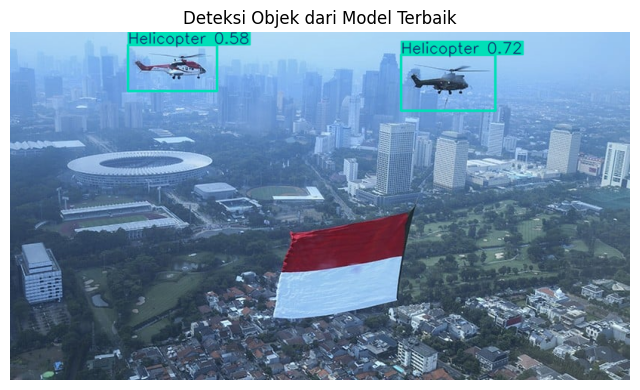

In [12]:
from IPython.display import display

def upload_and_detect():
    print("📸 Silakan upload file gambar (.jpg/.png):")
    uploaded = files.upload()
    image_file = next((f for f in uploaded if f.endswith(('.jpg', '.png'))), None)

    if image_file:
        img = cv2.imread(image_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = model_fix.predict(image_file, imgsz=640, conf=0.25)
        result_img = results[0].plot()
        result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 8))
        plt.imshow(result_img)
        plt.axis('off')
        plt.title("Deteksi Objek dari Model Terbaik")
        plt.show()
    else:
        print("File gambar tidak ditemukan. Silakan upload file dengan ekstensi .jpg atau .png.")

upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving burng.jpg to burng (1).jpg

image 1/1 /content/burng (1).jpg: 448x640 4 Birds, 1 Helicopter, 39.5ms
Speed: 3.4ms preprocess, 39.5ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


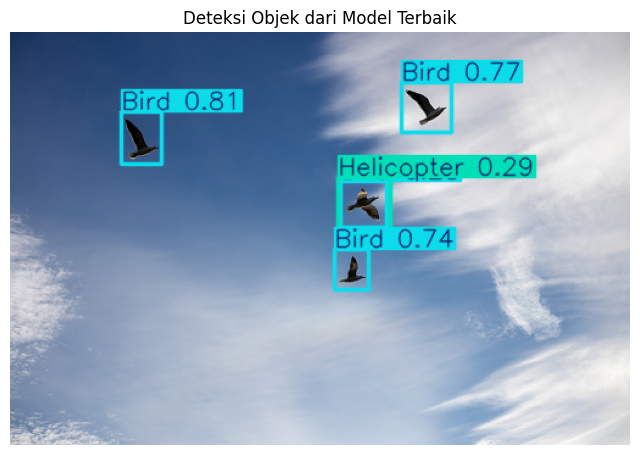

In [15]:
upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving istockphoto-1332573840-170667a.jpg to istockphoto-1332573840-170667a.jpg

image 1/1 /content/istockphoto-1332573840-170667a.jpg: 288x640 1 Airplane, 1 Drone, 58.9ms
Speed: 3.1ms preprocess, 58.9ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)


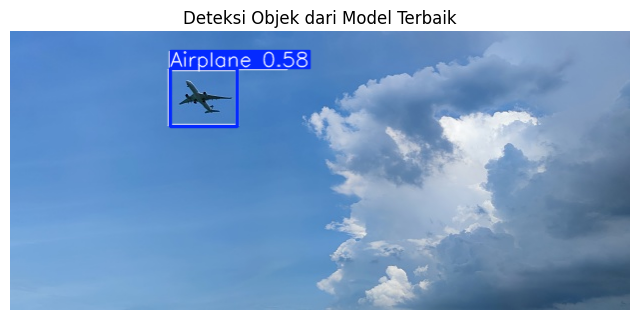

In [18]:
upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving drone yolov12.jpg to drone yolov12.jpg

image 1/1 /content/drone yolov12.jpg: 448x640 8 Drones, 17.2ms
Speed: 2.1ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


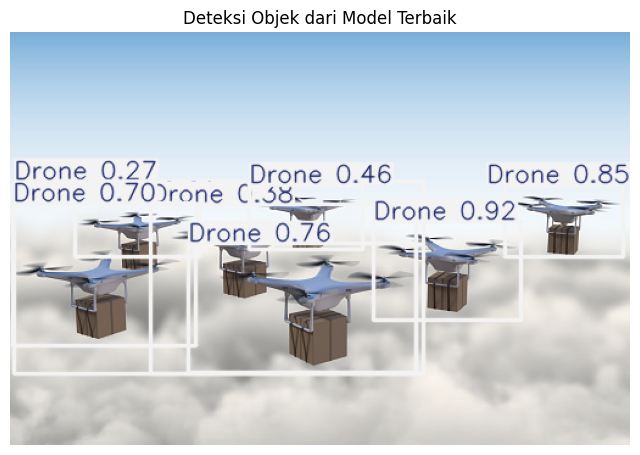

In [19]:
upload_and_detect()